# Релизуйте свой классификатор KNN

### Импорты

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [ ]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbors: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.metric = metric

    self.X = None
    self.y = None

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    "fit просто запоминает обучающую выборку"
    self.X = X
    self.y = y

  def predict(self, Xt: np.ndarray) -> np.ndarray:
    self.Xt = Xt

    def metric(a, b):
      "Функция, которая выбирает метрику и считает расстояния по ней"
      if self.metric == "euclidean":
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
      elif self.metric == "manhattan":
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    def weights(self, weights):
      "функция, которая выбирает с какими весами выполнять вычисления расстояний"
      if self.weights == 'distance':
        return 1
      return 0

    predict = []                                       
    for i in range(len(self.Xt)):                      
      dist = []                                        
      for j in range(len(self.X)):                    
        length = metric(self.Xt[i], self.X[j])         
        dist.append((length, self.y[j]))               
      near_points = sorted(dist)[:self.n_neighbors]    
      classes = list(set(self.y))                      
      sum_class = np.zeros(len(classes))               
      for q in range(len(near_points)):
        for u in range(len(classes)):                  
          if weights(self, weights):                                                    
            if near_points[q][1] == classes[u]:        
              sum_class[u] += 1/near_points[q][0]
          else:
            if near_points[q][1] == classes[u]:        
              sum_class[u] += 1
      sum_class = list(sum_class)                      
      predict.append(classes[sum_class.index(max(sum_class))])                 
    return predict

### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



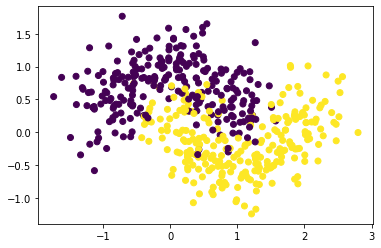

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def knn(n_neighbors=5, weights='uniform', metric='euclidean'):
  """Функция для knn из sklearn"""
  knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return accuracy_score(y_test, y_pred)

In [ ]:
def my_knn(n_neighbors=5, weights='uniform', metric='euclidean'):
  """Моя функция knn"""
  my_knn = MyKNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric) 
  my_knn.fit(X_train, y_train)
  y_predict = my_knn.predict(X_test)
  return accuracy_score(y_test, y_predict)

In [ ]:
print(f'Параметры по умолчанию: Sklearn KNN - {knn()}, My KNN - {my_knn()}')
print('---------------------------------------------------------')
print(f'weights="distance": Sklearn KNN - {knn(weights="distance")}, My KNN - {my_knn(weights="distance")}')
print('---------------------------------------------------------')
print(f'metric="manhattan": Sklearn KNN - {knn(metric="manhattan")}, My KNN - {my_knn(metric="manhattan")}')
print('---------------------------------------------------------')
print(f'weights="distance" и metric="manhattan": Sklearn KNN - {knn(weights="distance", metric="manhattan")}, My KNN - {my_knn(weights="distance", metric="manhattan")}') 

Параметры по умолчанию: Sklearn KNN - 0.89, My KNN - 0.89
---------------------------------------------------------
weights="distance": Sklearn KNN - 0.87, My KNN - 0.87
---------------------------------------------------------
metric="manhattan": Sklearn KNN - 0.92, My KNN - 0.92
---------------------------------------------------------
weights="distance" и metric="manhattan": Sklearn KNN - 0.88, My KNN - 0.88


In [ ]:
def show(text='Параметры по умолчанию', weights='uniform', metric='euclidean'):
  list_k, list_acc, list_my_acc = [], [], []
  for k in range(1, 11):
    list_k.append(k)
    list_acc.append(knn(n_neighbors=k, weights=weights, metric=metric))
    list_my_acc.append(my_knn(n_neighbors=k, weights=weights, metric=metric))

  plt.title(f'{text}')
  plt.xlabel("k")
  plt.ylabel("accuracy")
  plt.grid()
  plt.plot(list_k, list_my_acc, 'b')
  plt.plot(list_k, list_acc, "y--",  linewidth=3.0)

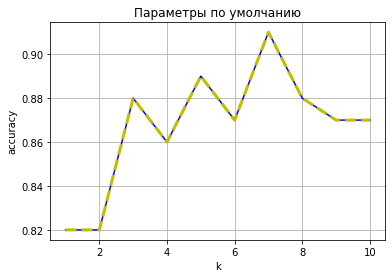

In [ ]:
show()

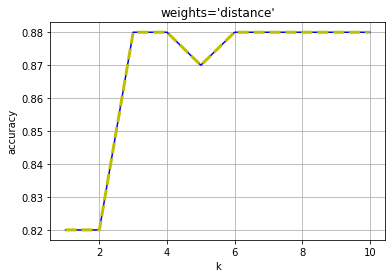

In [ ]:
show(text="weights='distance'", weights='distance')

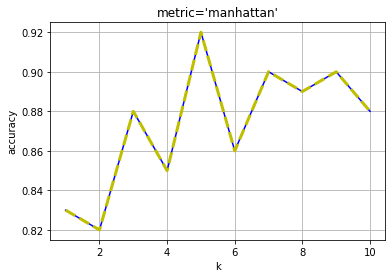

In [ ]:
show(text="metric='manhattan'", metric='manhattan')

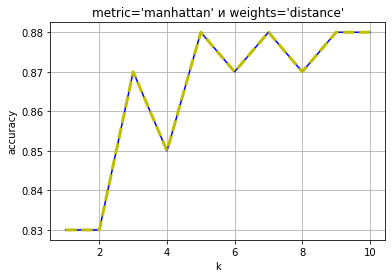

In [ ]:
show(text="metric='manhattan' и weights='distance'", weights='distance', metric='manhattan')

**Вывод**

Написав свою реализацию KNN, у меня получилось достичь точно таких же результатов, как и KNN из Sklearn, при разных параметрах, изменяя k, weights и metric, это видно и по результам accuracy, и по графикам. Также из второго графика можно выделить интересную особенность: при использовании weights='distance' график становится менее шумным, начиная с k=3 и до k=10 accuracy держится на одном уровне (за исключением k=5), однако accuracy не самый высокий. Самый низкий accuracy получился 0.82 (достигался при различных параметрах), самый высокий accuracy - 0.92, при параметрах k=5, weights='uniform', metric='manhattan'